<a href="https://colab.research.google.com/github/lezya/DeepLearning/blob/master/Visualization_of_Battery_Data_Checking_the_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os

battery_dataset = pd.read_csv('./data0505.csv')

# preprocessing

# Assume degradation only during charging (Power > 0, SOC > 0, SOH > 0)
battery_dataset = battery_dataset[battery_dataset["Power"] > 0]
battery_dataset = battery_dataset[battery_dataset["SOC"] > 0]
battery_dataset = battery_dataset[battery_dataset["SOH"] > 0]

battery_dataset["SEI_delta"] = 1E-7*battery_dataset["SEI_delta"]
battery_dataset.tail()


print(battery_dataset["SEI_delta"].max())
print(battery_dataset["SEI_delta"].min())

##### Export the cleaned data

# battery_dataset.to_csv("./data0505_charging.csv")



5.9041066e-06
4.385938e-06


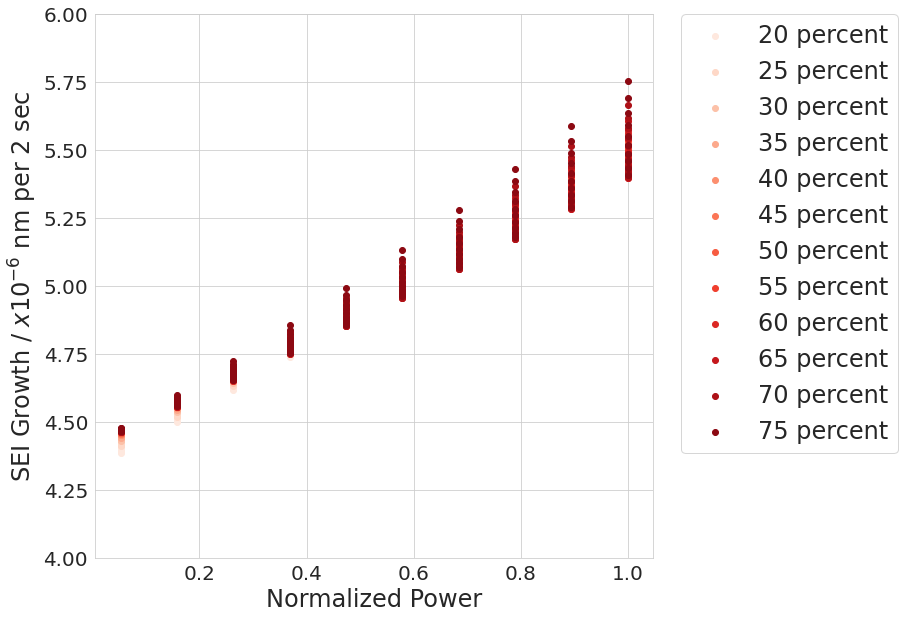

In [2]:
# Effect of Starting SOC on SEI Delta

import matplotlib.pyplot as plt
import seaborn as sns

# Possible Power 
power_values = sorted(list(set(battery_dataset["Power"])))


sns.set_style('whitegrid')
reds_colors = sns.color_palette('Reds', 12)

fig = plt.figure(figsize=(10,10))

for color_index, state_of_charge in enumerate(range(20, 80, 5)):
    soc_ds = battery_dataset[battery_dataset["SOC"] == state_of_charge]
    plt.scatter(soc_ds["Power"], 1e6*soc_ds['SEI_delta'], color = reds_colors[color_index], label = "%s percent"%state_of_charge)


plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Normalized Power", fontsize=24)
plt.ylabel("SEI Growth / $x 10^{-6}$ nm per 2 sec", fontsize=24)
plt.ylim([4,6])

plt.legend(bbox_to_anchor=(1.05, 1), fontsize=24, loc=2, borderaxespad=0.)

plt.show()

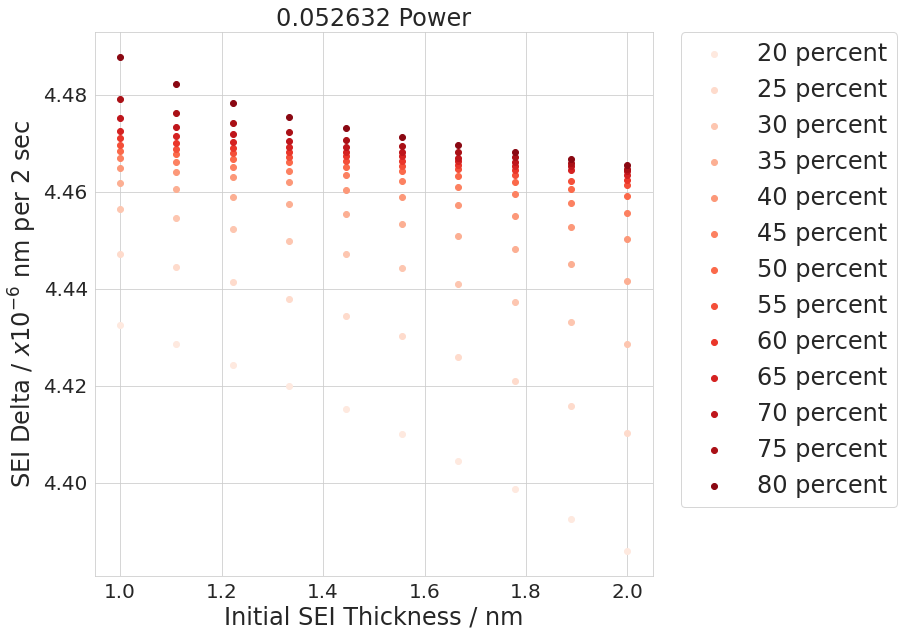

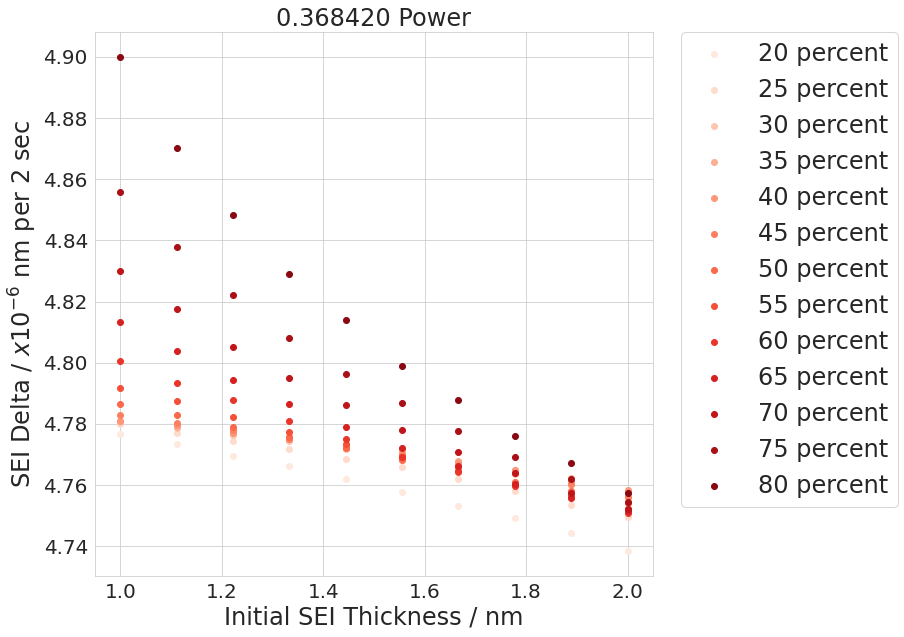

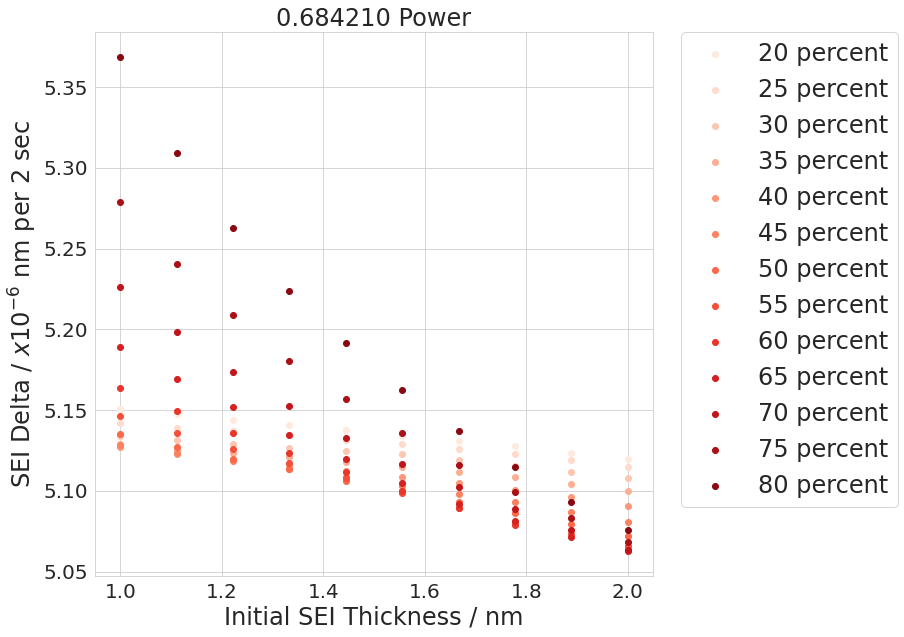

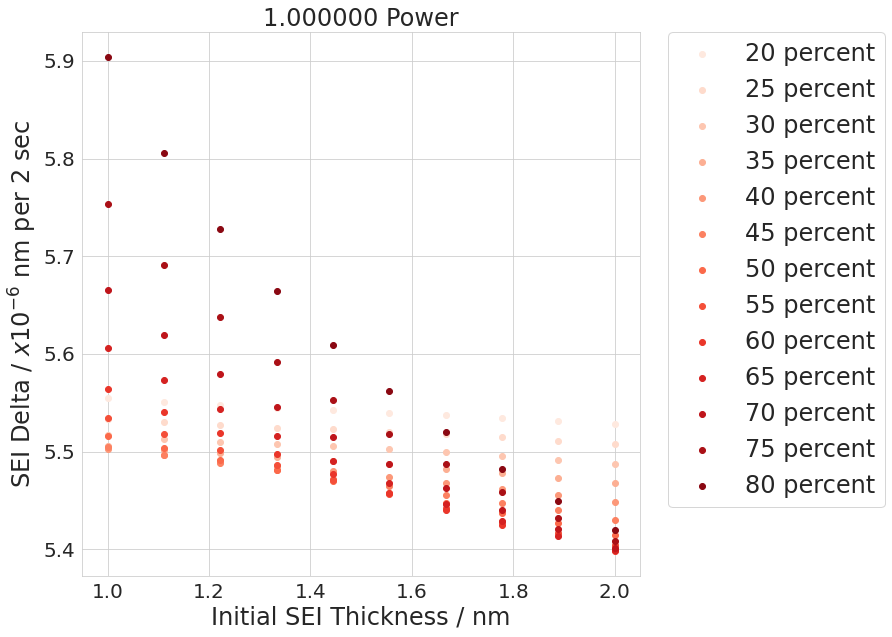

In [3]:
# Effect of Starting Initial SEI Thickness on SEI Delta


sns.set_style('whitegrid')
reds_colors = sns.color_palette('Reds', 13)


plot_power_values = [power_values[0], power_values[3], power_values[6], power_values[-1]]

# Generates scatterplot for four power values showing degradation as a function of starting state of health 
# and colors correlate with starting state of charge

for pwr_index, power_value in enumerate(plot_power_values):
    

    fig = plt.figure(figsize=(10,10))
    
    
    for color_index, state_of_charge in enumerate(range(20, 81, 5)):
        
        soc_ds = battery_dataset[battery_dataset["SOC"] == state_of_charge]
        pwr_ds = soc_ds[soc_ds["Power"] == power_value]
        plt.scatter(pwr_ds["SOH"], 1e6*pwr_ds['SEI_delta'], color = reds_colors[color_index], label = "%s percent"%state_of_charge)

    plt.title("%f Power"%power_value, fontsize=24)

    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel("Initial SEI Thickness / nm", fontsize=24)
    plt.ylabel("SEI Delta / $x 10^{-6}$ nm per 2 sec", fontsize=24)
    
    plt.legend(bbox_to_anchor=(1.05, 1), fontsize=24, loc=2, borderaxespad=0.)

    plt.show()

FileNotFoundError: ignored

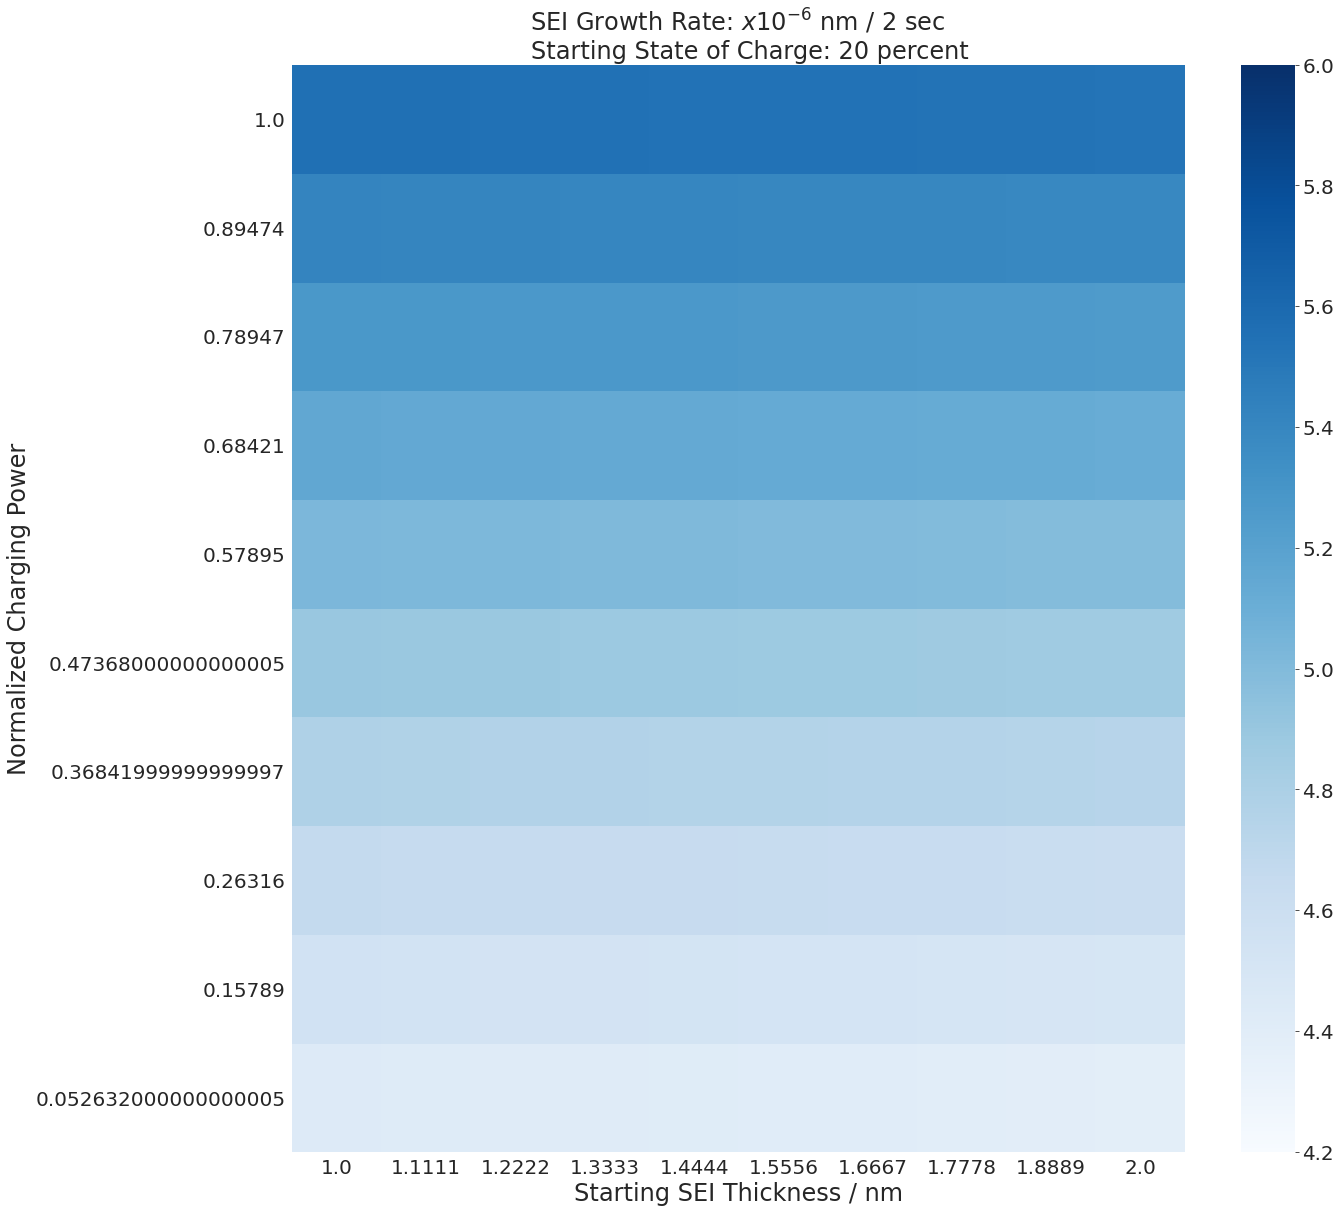

In [4]:
# Heatmap Generation

# Generates the list of all unique SOC values and lists them
SOC_values = sorted(list(set(battery_dataset["SOC"])))

# Iterates through all listed starting state of charge values
for index, current_SOC_value in enumerate(SOC_values):

    # Formats dataset into the expected format for SNS heatmap
    heatmap_generation = battery_dataset[battery_dataset['SOC'] == current_SOC_value]
    heatmap_generation_scaled = heatmap_generation.copy()
    heatmap_generation_scaled['SEI_delta'] = 1e6*heatmap_generation["SEI_delta"]


    pwr_ds_pivot = heatmap_generation_scaled.pivot("Power", "SOH", "SEI_delta")

    fig = plt.figure(figsize=(20,20))
    ax = sns.heatmap(pwr_ds_pivot,   vmin=4.2, vmax = 6.0, cmap="Blues")

    ax.set_title("SEI Growth Rate: $x10^{-6}$ nm / 2 sec \n   Starting State of Charge: %d percent"%current_SOC_value, fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel("Starting SEI Thickness / nm", fontsize=24)
    ax.set_ylabel("Normalized Charging Power", fontsize=24)

    ax.set_ylim([0,10])

    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)

    # Export data

    plt.savefig(os.path.join("figures", "output_%03d.png"%index), dpi=300)
    plt.close(fig)
